# Trabajo Práctico 1
### Alumnos:
#### Patricio Avigliano, 98861
#### Kevin Cajachuán, 98725
#### Guillermo Condori, 98688  
  
    
    
Link al repositorio: https://github.com/Kajachuan/RepoDatos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
from importlib import reload
reload(sys)

<module 'sys' (built-in)>

In [5]:
data = pd.read_csv('properati_data.csv', low_memory=False)

In [6]:
# Analizamos los tipos de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457318 entries, 0 to 457317
Data columns (total 21 columns):
id                            182721 non-null object
created_on                    457318 non-null object
property_type                 457318 non-null object
place_with_parent_names       457318 non-null object
geonames_id                   366919 non-null float64
lat                           321223 non-null float64
lon                           321223 non-null float64
price                         457318 non-null float64
currency                      457318 non-null object
price_aprox_local_currency    457318 non-null float64
price_aprox_usd               457318 non-null float64
surface_in_m2                 167885 non-null float64
surface_total_in_m2           153274 non-null float64
surface_covered_in_m2         191528 non-null float64
price_usd_per_m2              292691 non-null float64
price_per_m2                  188233 non-null float64
floor                         

In [7]:
# Vemos cuantos datos faltan en cada columna
data.isnull().sum()

id                            274597
created_on                         0
property_type                      0
place_with_parent_names            0
geonames_id                    90399
lat                           136095
lon                           136095
price                              0
currency                           0
price_aprox_local_currency         0
price_aprox_usd                    0
surface_in_m2                 289433
surface_total_in_m2           304044
surface_covered_in_m2         265790
price_usd_per_m2              164627
price_per_m2                  269085
floor                         380046
rooms                         211938
expenses                      422965
description                    33113
actual                             0
dtype: int64

## ¿Cuántas propiedades hay de cada tipo?

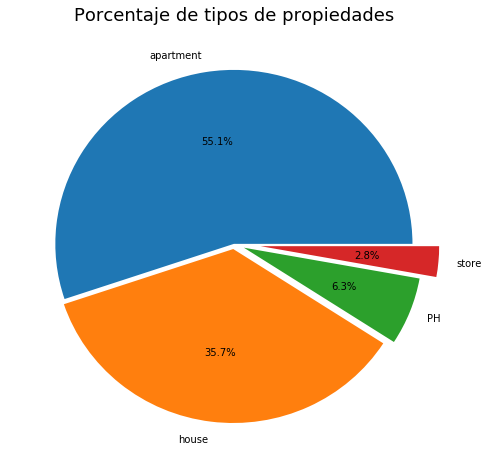

In [8]:
tipos = data['property_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.title('Porcentaje de tipos de propiedades', fontsize = 18)
plt.pie(tipos, labels=tipos.keys(), autopct='%1.1f%%', explode=(0, .03, .06, .15))
plt.ylabel('')

Observamos que la mayoria de los registros publicados corresponden a departamentos y casas.

## ¿Cuántas propiedades publicadas hay en cada zona?

In [9]:
location=data['place_with_parent_names'].value_counts()
tagsCount={}
for key in location.keys():
    aux=key.split('|')
    aux=aux[1:-1]
    for tag in aux:
        tagsCount[tag]=tagsCount.get(tag,0)+location[key]
tagsCount.pop('')
tagsCount.pop('Argentina')
tagsCount['Country Maschwitz Club']=tagsCount.pop(' Country Maschwitz Club')
tagsCount['los alamos']=tagsCount.pop(' los alamos')
capitalYGB={}
capitalYGB['Capital Federal']=tagsCount.pop('Capital Federal')
capitalYGB['Bs.As. G.B.A. Zona Norte']=tagsCount.pop('Bs.As. G.B.A. Zona Norte')
capitalYGB['Bs.As. G.B.A. Zona Sur']=tagsCount.pop('Bs.As. G.B.A. Zona Sur')
capitalYGB['Bs.As. G.B.A. Zona Oeste']=tagsCount.pop('Bs.As. G.B.A. Zona Oeste')

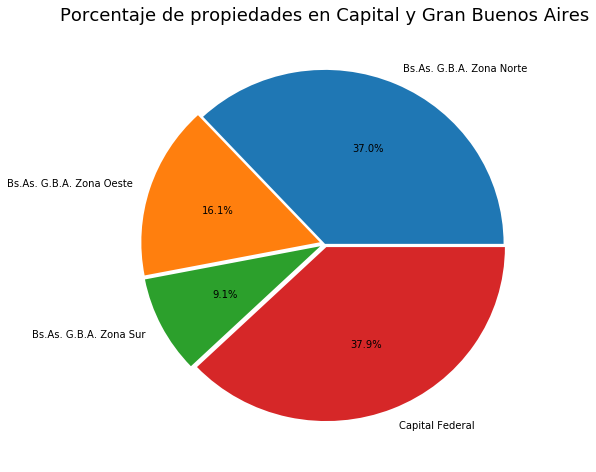

In [10]:
zona = pd.Series(capitalYGB, name='Zona')
zona.index.name = 'Lugar'
zona.reset_index()
plt.figure(figsize=(8, 8))
plt.title('Porcentaje de propiedades en Capital y Gran Buenos Aires', fontsize = 18)
plt.pie(zona, labels=zona.keys(), autopct='%1.1f%%', explode=(0, .03, .03, .02))
plt.ylabel('')

Se observa que en Capital Federal hay mas propiedades que en las diferentes zonas del Gran Buenos Aires. Sin embargo la diferencia de cantidad no es tanta con respecto a Zona Norte.

## ¿Cuántas propiedades publicadas hay en cada localidad?

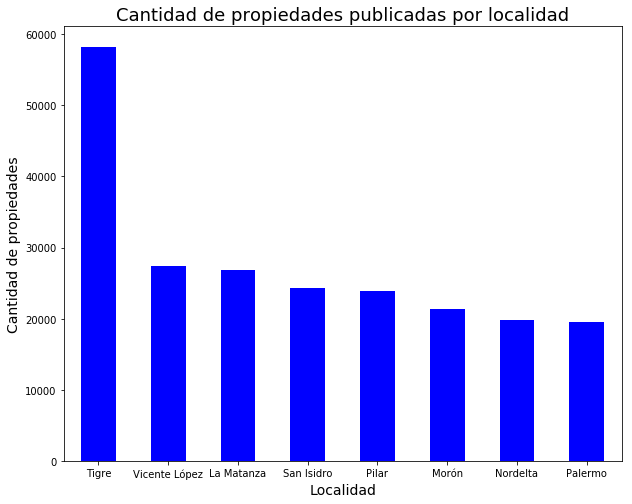

In [11]:
tagsRelevantes={}
for key in tagsCount:
    if tagsCount[key]>15500:
        tagsRelevantes[key]=tagsCount[key]
rel = pd.Series(tagsRelevantes, name='Cantidad')
rel.index.name = 'Barrio'
rel.reset_index()
rel.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de propiedades publicadas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de propiedades', fontsize = 14)

Se puede observar en el gráfico que Tigre es el lugar en el que hay mas propiedades publicadas.

## ¿Cuál es el precio promedio de todas las propiedades en cada localidad?

In [12]:
dataPorLocation={}
housePorLocation={}
storePorLocation={}
phPorLocation={}
apartmentPorLocation={}
for location in tagsRelevantes:
    dataPorLocation[location]=data[data.place_with_parent_names.str.contains(location)]
    housePorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='house']
    storePorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='store']
    apartmentPorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='apartment']
    phPorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='PH']

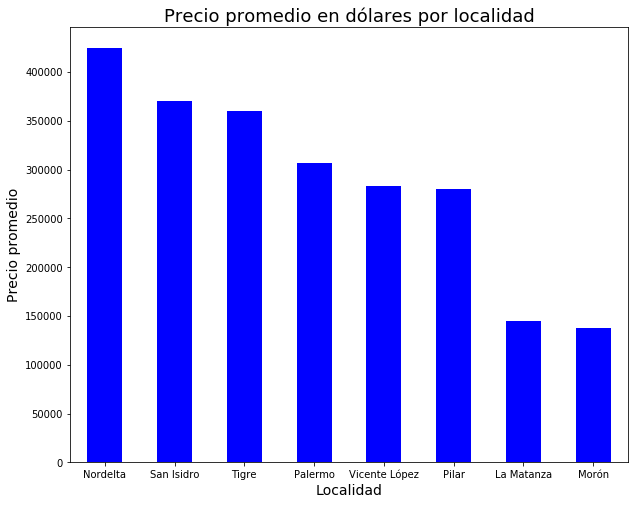

In [13]:
meanPriceUsdPorLocation={}
for location in dataPorLocation:
    meanPriceUsdPorLocation[location]=dataPorLocation[location]['price_aprox_usd'].mean()
mPrice = pd.Series(meanPriceUsdPorLocation, name='Precio promedio')
mPrice.index.name = 'Barrio'
mPrice.reset_index()
mPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dólares por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

Se observa que Nordelta es la ubicación más cara en comparación con las demas. En el mismo grafico se puede observar que Palermo es el barrio más caro de Capital Federal.

## ¿Cuál es el desvío estandar de todas las propiedades en cada localidad?

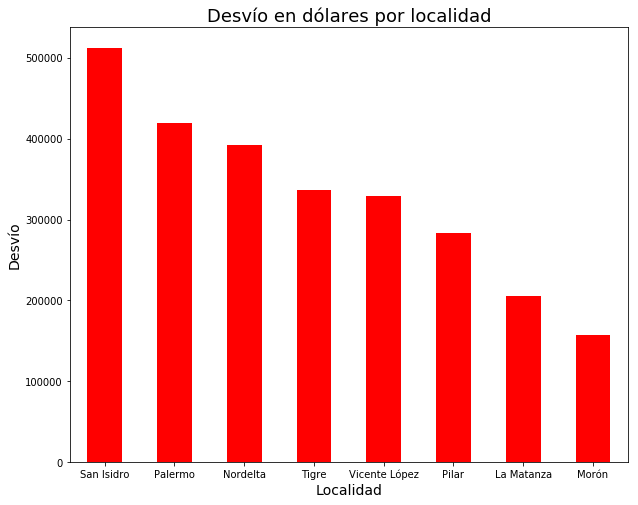

In [14]:
varPriceUsdPorLocation={}
for location in dataPorLocation:
    varPriceUsdPorLocation[location]=dataPorLocation[location]['price_aprox_usd'].std()
vPrice = pd.Series(varPriceUsdPorLocation, name='Precio promedio')
vPrice.index.name = 'Barrio'
vPrice.reset_index()
vPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'red')
plt.title('Desvío en dólares por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvío', fontsize = 14)

En este gráfico se puede observar que en San Isidro los precios varían mucho en comparación a otros lugares y que en Morón, los precios son mas parecidos entre sí.  
Anteriormente, se había concluído que Palermo era el barrio más caro de Capital Federal. Además de esto, es el barrio en el que más varían los precios de las propiedades.

## ¿Cuál es el precio promedio de las casas en cada localidad?

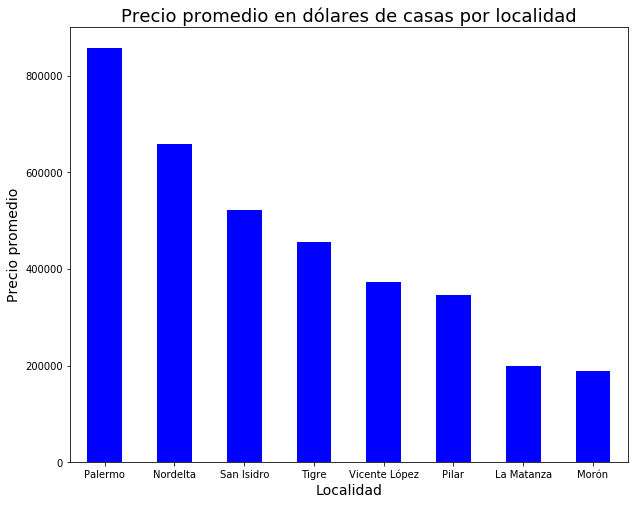

In [15]:
#medias de precio de casas por barrio
meanHousePriceUsdPorLocation={}
for location in housePorLocation:
    meanHousePriceUsdPorLocation[location]=housePorLocation[location]['price_aprox_usd'].mean()
mHPrice = pd.Series(meanHousePriceUsdPorLocation, name='Precio promedio')
mHPrice.index.name = 'Barrio'
mHPrice.reset_index()
mHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dólares de casas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

En el gráfico se observa que en Palermo se encuentran las casas más caras, seguido por Nordelta.

## ¿Cuál es el desvío estandar de las casas en cada localidad?

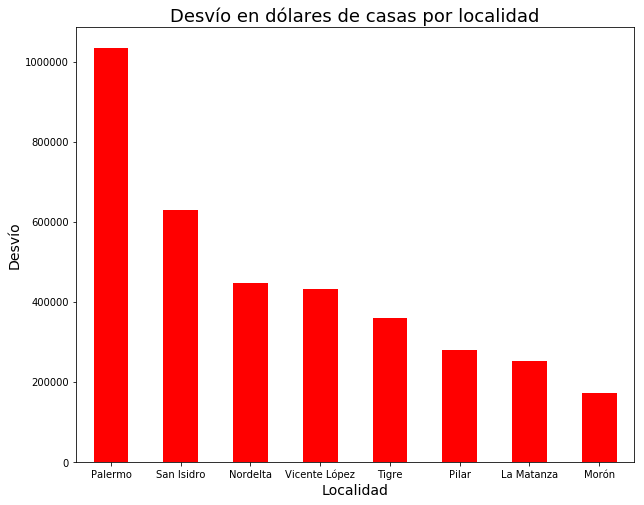

In [16]:
varHousePriceUsdPorLocation={}
for location in housePorLocation:
    varHousePriceUsdPorLocation[location]=housePorLocation[location]['price_aprox_usd'].std()
vHPrice = pd.Series(varHousePriceUsdPorLocation, name='Precio promedio')
vHPrice.index.name = 'Barrio'
vHPrice.reset_index()
vHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'red')
plt.title('Desvío en dólares de casas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvío', fontsize = 14)

Además, en Palermo los precios de las casas son muy variados.

## ¿Cuál es el precio promedio de los locales en cada localidad?

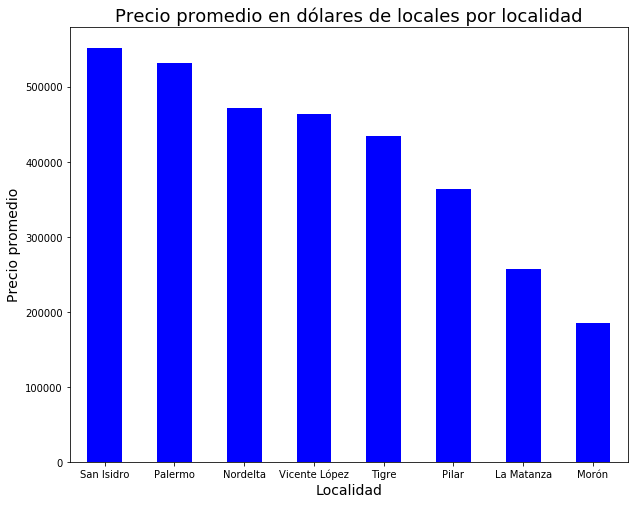

In [17]:
meanStorePriceUsdPorLocation={}
for location in storePorLocation:
    meanStorePriceUsdPorLocation[location]=storePorLocation[location]['price_aprox_usd'].mean()
mSPrice = pd.Series(meanStorePriceUsdPorLocation, name='Precio promedio')
mSPrice.index.name = 'Barrio'
mSPrice.reset_index()
mSPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dólares de locales por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

Se puede observar que en San Isidro los locales son más caros.

## ¿Cuál es el desvío estandar de los locales en cada localidad?

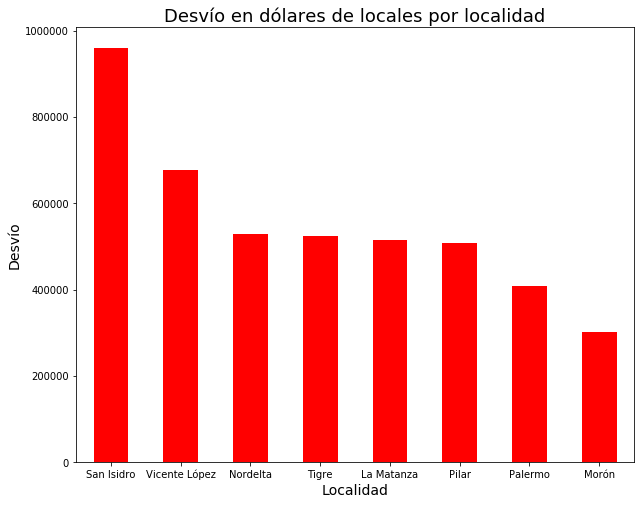

In [18]:
varStorePriceUsdPorLocation={}
for location in storePorLocation:
    varStorePriceUsdPorLocation[location]=storePorLocation[location]['price_aprox_usd'].std()
vSPrice = pd.Series(varStorePriceUsdPorLocation, name='Precio promedio')
vSPrice.index.name = 'Barrio'
vSPrice.reset_index()
vSPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'red')
plt.title('Desvío en dólares de locales por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvío', fontsize = 14)

Además en San Isidro los precios son variados.

## ¿Cuál es el precio promedio de los PH en cada localidad?

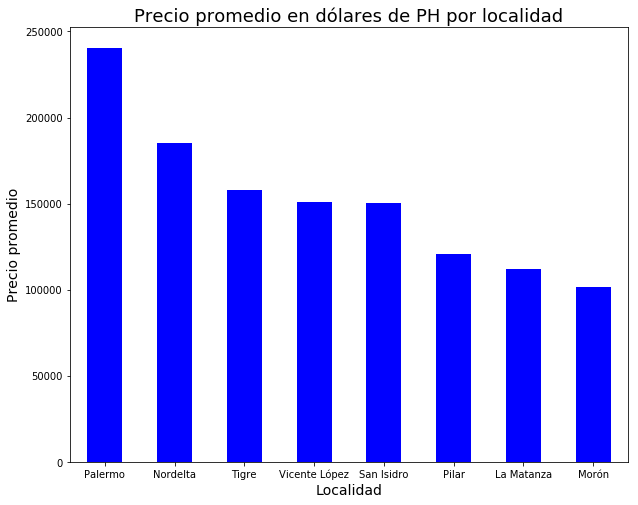

In [19]:
meanPhPriceUsdPorLocation={}
for location in phPorLocation:
    meanPhPriceUsdPorLocation[location]=phPorLocation[location]['price_aprox_usd'].mean()
mPHPrice = pd.Series(meanPhPriceUsdPorLocation, name='Precio promedio')
mPHPrice.index.name = 'Barrio'
mPHPrice.reset_index()
mPHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dólares de PH por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

En Palermo se encuentran los PH más caros.

## ¿Cuál es el desvío estandar de los PH en cada localidad?

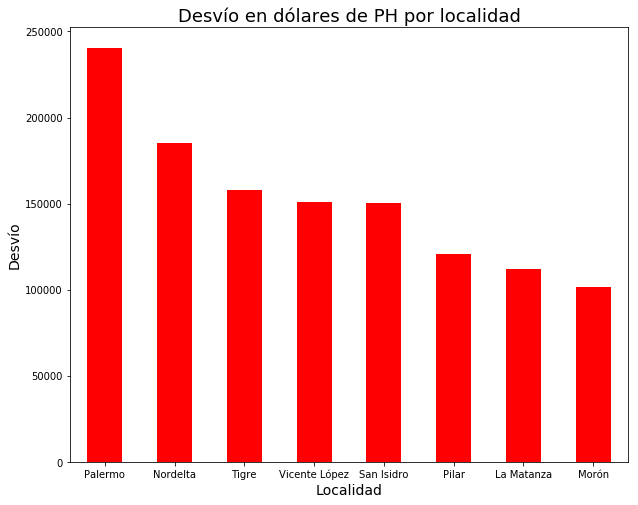

In [20]:
varPhPriceUsdPorLocation={}
for location in phPorLocation:
    varPhPriceUsdPorLocation[location]=phPorLocation[location]['price_aprox_usd'].std()
vPHPrice = pd.Series(meanPhPriceUsdPorLocation, name='Precio promedio')
vPHPrice.index.name = 'Barrio'
vPHPrice.reset_index()
vPHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'red')
plt.title('Desvío en dólares de PH por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvío', fontsize = 14)

Además en Palermo también hay variedad de precios de PH.

## ¿Cuál es el precio promedio de los departamentos en cada localidad?

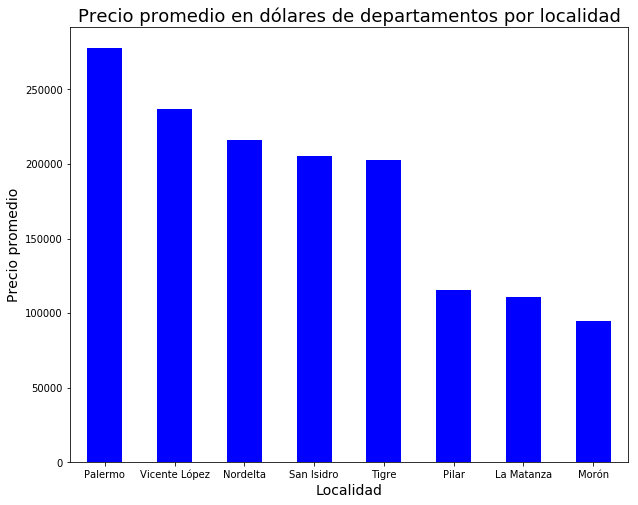

In [21]:
meanApartmentPriceUsdPorLocation={}
for location in apartmentPorLocation:
    meanApartmentPriceUsdPorLocation[location]=apartmentPorLocation[location]['price_aprox_usd'].mean()
mAPrice = pd.Series(meanApartmentPriceUsdPorLocation, name='Precio promedio')
mAPrice.index.name = 'Barrio'
mAPrice.reset_index()
mAPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dólares de departamentos por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

En Palermo los departamentos son más caros.

## ¿Cuál es el desvío estandar de los departamentos en cada localidad?

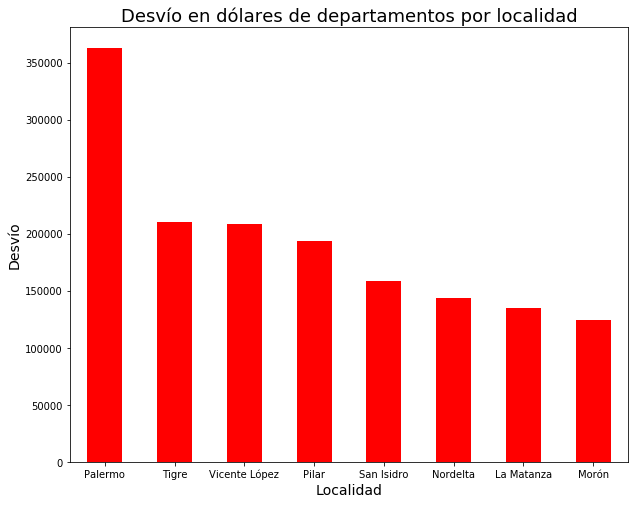

In [22]:
varApartmentPriceUsdPorLocation={}
for location in apartmentPorLocation:
    varApartmentPriceUsdPorLocation[location]=apartmentPorLocation[location]['price_aprox_usd'].std()
vAPrice = pd.Series(varApartmentPriceUsdPorLocation, name='Desvio')
vAPrice.index.name = 'Barrio'
vAPrice.reset_index()
vAPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'red')
plt.title('Desvío en dólares de departamentos por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvío', fontsize = 14)

Además en Palermo los precios de los departamentos varían mucho.

## ¿Cuántas publicaciones se realizaron en cada año?

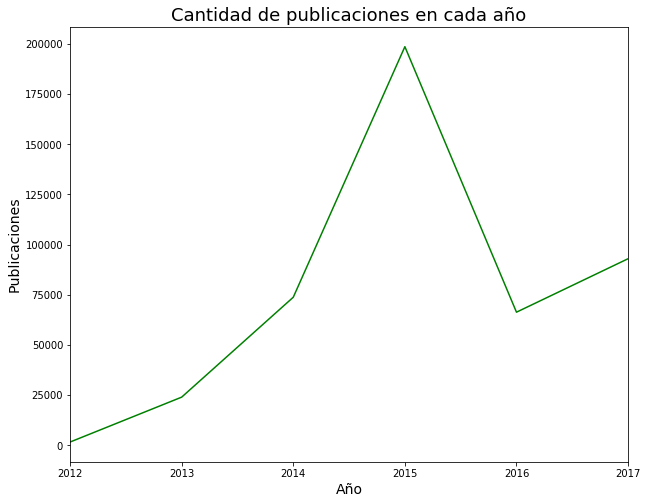

In [23]:
dates=data['created_on']
yearsCount={}
monthsCount={}
daysCount={}
for date in dates:
    aux=date.split('-')
    yearsCount[aux[0]]=yearsCount.get(aux[0],0)+1
    monthsCount[aux[1]]=monthsCount.get(aux[1],0)+1
    daysCount[aux[2]]=daysCount.get(aux[2],0)+1
 #cuantos registros fueron publicados en cada año
y = pd.Series(yearsCount, name='Cantidad')
y.index.name = 'Año'
y.reset_index()
y.plot(kind = 'line', rot = 0, figsize = (10, 8), color = 'green')
plt.title('Cantidad de publicaciones en cada año', fontsize = 18)
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Publicaciones', fontsize = 14)

2015 fue el año en que hubo más cantidad de publicaciones.

## ¿Cuántas publicaciones se realizaron en cada mes?

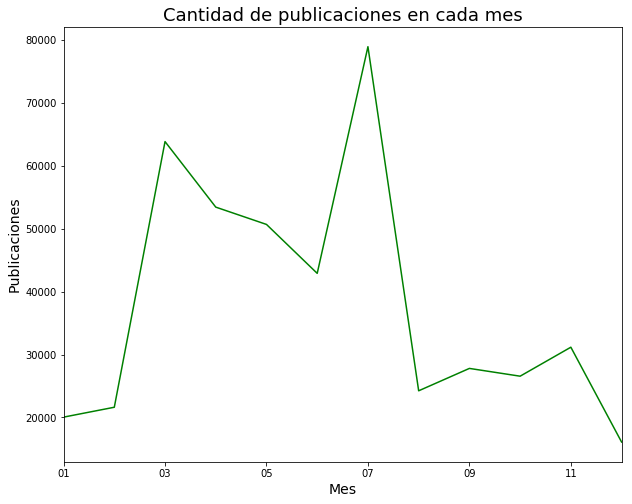

In [24]:
  #cuantos registros fueron publicados en cada mes del año
m = pd.Series(monthsCount, name='Cantidad')
m.index.name = 'Año'
m.reset_index()
m.plot(kind = 'line', rot = 0, figsize = (10, 8), color = 'green')
plt.title('Cantidad de publicaciones en cada mes', fontsize = 18)
plt.xlabel('Mes', fontsize = 14)
plt.ylabel('Publicaciones', fontsize = 14)

En los meses de marzo y julio, la cantidad de publicaciones es mayor.

## ¿Cuántas publicaciones se realizaron en cada dia?

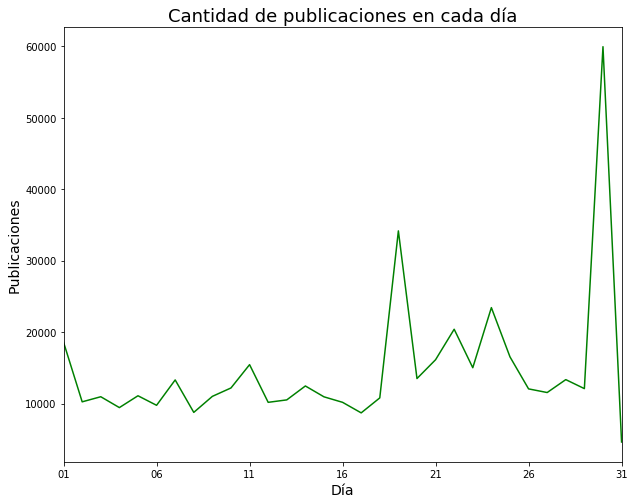

In [25]:
   #cuantos registros fueron publicados en cada dia del mes
d = pd.Series(daysCount, name='Cantidad')
d.index.name = 'Año'
d.reset_index()
d.plot(kind = 'line', rot = 0, figsize = (10, 8), color = 'green')
plt.title('Cantidad de publicaciones en cada día', fontsize = 18)
plt.xlabel('Día', fontsize = 14)
plt.ylabel('Publicaciones', fontsize = 14)

En el gráfico se puede observar que a fin de mes, la cantidad de publicaciones es mayor.

## ¿Depende el precio de la propiedad de la cantidad de habitaciones?

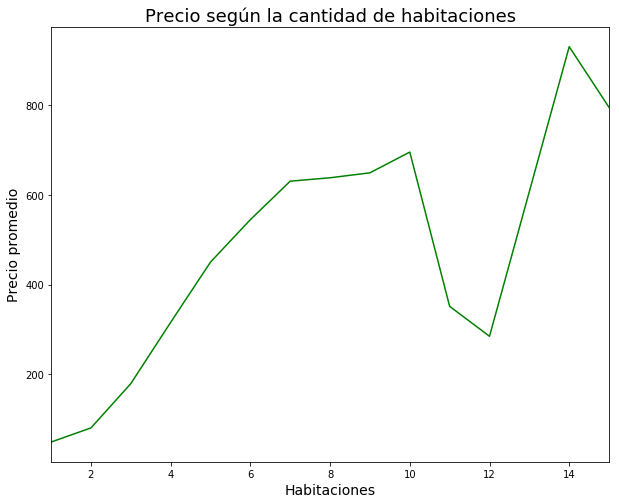

In [26]:
dataPorRooms=data[data.rooms.isnull()==False]
dataPorRooms=dataPorRooms[dataPorRooms.rooms!=0]
dataPorRooms=dataPorRooms[dataPorRooms.rooms<=15]
dataPorRooms=dataPorRooms[dataPorRooms.property_type!='store']
dataPorRooms=dataPorRooms[dataPorRooms.surface_in_m2.isnull()==False]
dataPorRooms=dataPorRooms.groupby('rooms')
dPR = dataPorRooms['surface_in_m2'].mean()
dPR.plot(kind = 'line', rot = 0, figsize = (10, 8), color = 'green')
plt.title('Precio según la cantidad de habitaciones', fontsize = 18)
plt.xlabel('Habitaciones', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

Vemos que a medida que una propiedad tiene un mayor numero de habitaciones su precio en promedio tiende a subir.

## ¿En qué localidades están las casas mas grandes?

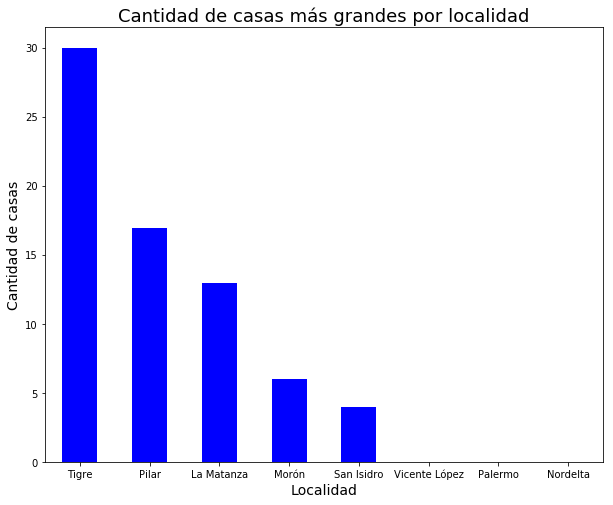

In [27]:
bigHousePorLocation={}
for location in housePorLocation:
        bigHousePorLocation[location]=len(housePorLocation[location][housePorLocation[location].surface_in_m2>10000])
tot=0
for location in bigHousePorLocation:
    tot+=bigHousePorLocation[location]

bh=pd.Series(bigHousePorLocation, name='%')
bh.index.name = 'Barrio'
bh.reset_index()
bh.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de casas más grandes por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de casas', fontsize = 14)

Podemos observar que no existen registros de grandes terrenos en lugares como Palermo, Vicente López o Nordelta, mientras que en zonas menos urbanizadas, como por ejemplo Tigre, si los hay.

## ¿En qué localidades están las casas mas chicas?

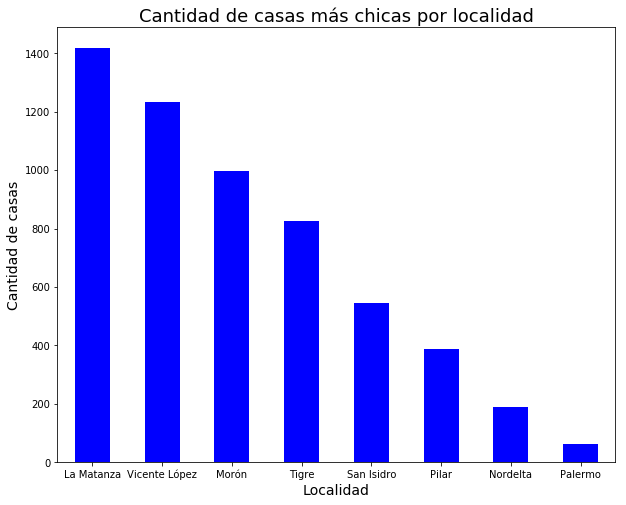

In [28]:
smallHousePorLocation={}
for location in housePorLocation:
        smallHousePorLocation[location]=housePorLocation[location][housePorLocation[location].surface_in_m2!=0]
        smallHousePorLocation[location]=len(smallHousePorLocation[location][smallHousePorLocation[location].surface_in_m2<150])
tot=0
for location in smallHousePorLocation:
    tot+=smallHousePorLocation[location]

sh=pd.Series(smallHousePorLocation, name='%')
sh.index.name = 'Barrio'
sh.reset_index()
sh.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de casas más chicas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de casas', fontsize = 14)

En el gráfico se puede observar que en La Matanza las casas son más chicas que en otros lugares.

## ¿En qué localidades están los departamentos mas grandes?

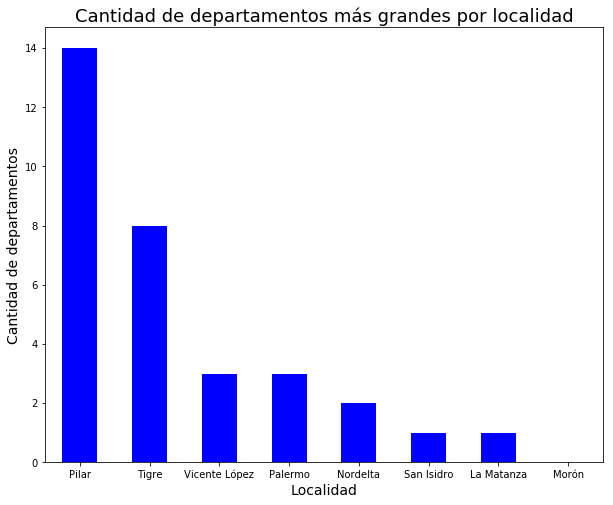

In [29]:
bigApartPorLocation={}
for location in apartmentPorLocation:
        bigApartPorLocation[location]=len(apartmentPorLocation[location][apartmentPorLocation[location].surface_in_m2>1000])
tot=0
for location in bigApartPorLocation:
    tot+=bigApartPorLocation[location]
    
ba=pd.Series(bigApartPorLocation, name='%')
ba.index.name = 'Barrio'
ba.reset_index()
ba.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de departamentos más grandes por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de departamentos', fontsize = 14)

Se puede observar que en Pilar, los departamentos son más grandes que en otros lugares.

## ¿En qué localidades están los departamentos mas chicos?

/home/pato/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


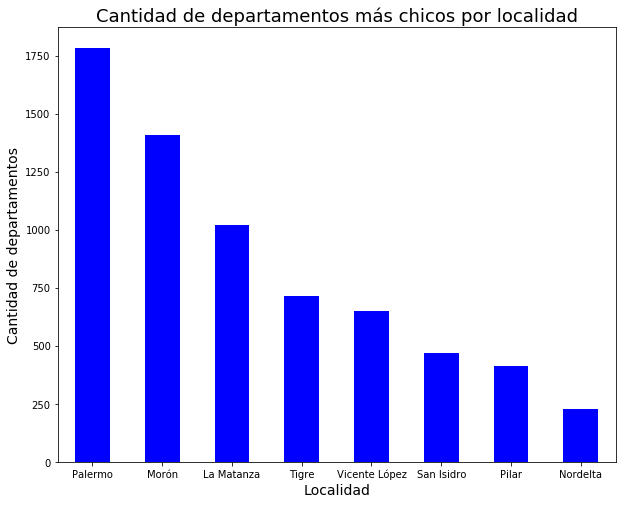

In [30]:
smallApartPorLocation={}
for location in apartmentPorLocation:
        smallApartPorLocation[location]=apartmentPorLocation[location][apartmentPorLocation[location].surface_in_m2!=0]
        smallApartPorLocation[location]=len(smallApartPorLocation[location][apartmentPorLocation[location].surface_in_m2<50])
tot=0
for location in smallApartPorLocation:
    tot+=smallApartPorLocation[location]
    
sa=pd.Series(smallApartPorLocation, name='%')
sa.index.name = 'Barrio'
sa.reset_index()
sa.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de departamentos más chicos por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de departamentos', fontsize = 14)

En este gráfico vemos que lugares como Palermo, Morón o La Matanza tienen una gran tasa de departamentos pequeños.

## ¿Cuántos locales hay en cada localidad?

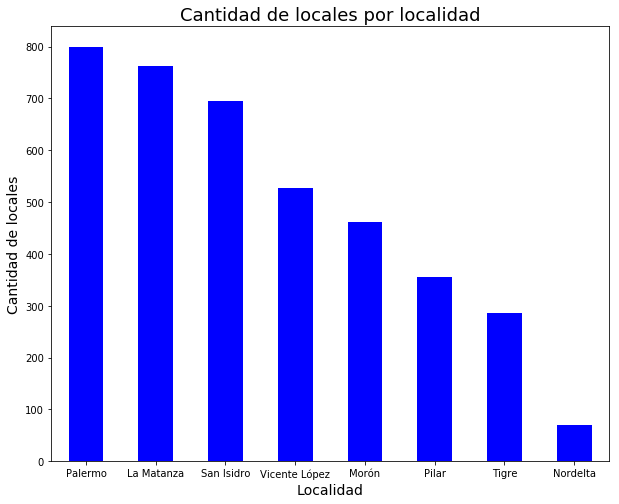

In [31]:
storeCountPorLocation={}
tot=0
for location in storePorLocation:
    storeCountPorLocation[location]=storePorLocation[location]['property_type'].count()
    tot+=storeCountPorLocation[location]
st=pd.Series(storeCountPorLocation, name='%')
st.index.name = 'Barrio'
st.reset_index()
st.sort_values(ascending = False).plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de locales por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de locales', fontsize = 14)

Se observa que en Palermo hay una mayor cantidad de locales publicados, mientras que en Nordelta no hay demasiados.

## Dependencia del precio con la cercanía una estación de subte

In [32]:
# Me quedo unicamente con las propiedades ubicadas en Capital Federal y aquellas que tengan el dato de Longitud
# y Latitud para poder calcular la distancia a las estaciones de subte.
# Además unicamente me quedo con las columnas de Longitud, Latitud y Precio Aproximado en Dólares.
cap = data.loc[data.place_with_parent_names.str.contains('Capital Federal')]\
          .loc[data.lat.notnull() & data.lon.notnull() & data.price_usd_per_m2.notnull()]\
          [['place_with_parent_names', 'lat', 'lon', 'price_usd_per_m2']]\

# Me quedo con los datos que verdaderamente estan situados geograficamente en un entorno de capital federal
cap = cap.loc[((cap.lat > -34.706569) & (cap.lat < -34.533606)) & ((cap.lon > -58.53109) & (cap.lon < -58.345428))]\
         .reset_index(drop = True)

In [33]:
subte = pd.read_csv('Datos Capital/estaciones-de-subte.csv',low_memory=False)
subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
lat         79 non-null float64
lon         79 non-null float64
ID          79 non-null int64
ESTACION    79 non-null object
LINEA       79 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 3.2+ KB


In [34]:
juramento=subte.loc[subte.ESTACION=='JURAMENTO'].reset_index(drop = True)
juramento

,lat,lon,ID,ESTACION,LINEA
0,-34.562309,-58.456489,65,JURAMENTO,D


In [35]:
SCALING_FACTOR=100000
for i in range(len(cap.index)):
    minima = (abs(cap.loc[i,'lat'] - juramento.loc[0,'lat']) + abs(cap.loc[i,'lon'] - juramento.loc[0,'lon']))*SCALING_FACTOR
    cap.loc[i, 'dist_juramento'] = minima

In [36]:
cerc_juramento=cap.sort_values('dist_juramento')\
.loc[cap.dist_juramento<95]\
.loc[(cap.dist_juramento<42.19) | (cap.dist_juramento>42.21)]
cerc_juramento

,place_with_parent_names,lat,lon,price_usd_per_m2,dist_juramento
59725,|Argentina|Capital Federal|Belgrano|,-34.562389,-58.456424,3513.513514,14.49476
57710,|Argentina|Capital Federal|Belgrano|,-34.562103,-58.456695,3225.000000,41.25524
86442,|Argentina|Capital Federal|Belgrano|,-34.562736,-58.456463,3166.666667,45.40476
86364,|Argentina|Capital Federal|Belgrano|,-34.562736,-58.456463,3200.000000,45.40476
85123,|Argentina|Capital Federal|Belgrano|,-34.562026,-58.456695,2934.426230,48.87524
61092,|Argentina|Capital Federal|Belgrano|,-34.562650,-58.456220,1222.222222,61.05476
62989,|Argentina|Capital Federal|Belgrano|,-34.562665,-58.456207,2100.000000,63.81476


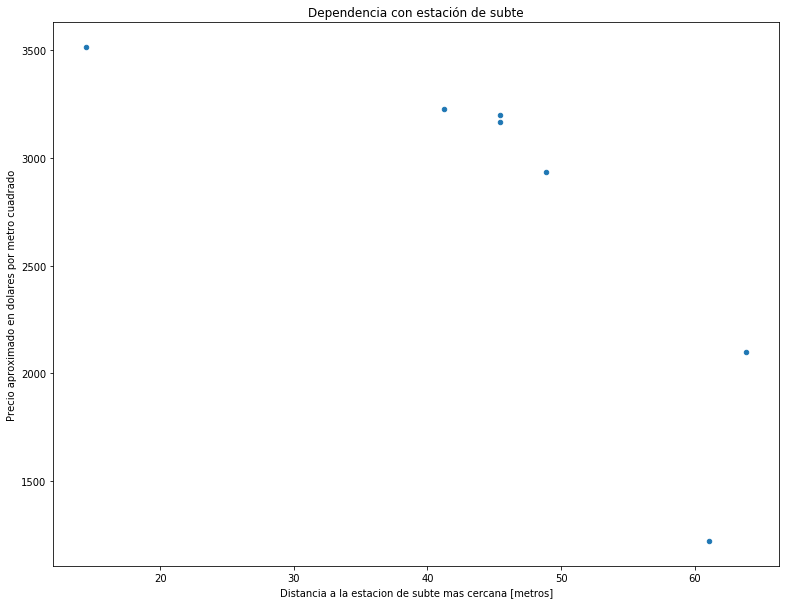

In [37]:
cerc_juramento.plot(kind = 'scatter', x = 'dist_juramento', y = 'price_usd_per_m2', alpha=1 , figsize=(13,10))
plt.title('Dependencia con estación de subte')
plt.xlabel('Distancia a la estacion de subte mas cercana [metros]')
plt.ylabel('Precio aproximado en dolares por metro cuadrado')

In [38]:
cerc_juramento[['dist_juramento', 'price_usd_per_m2']].corr()

,dist_juramento,price_usd_per_m2
dist_juramento,1.000000,-0.770945
price_usd_per_m2,-0.770945,1.000000


Aca podemos observar que el coeficiente de correlacion es distinto de 0. Por lo tanto la covarianza entre la distancia a la estacion y el precio por metro cuadrado de la propiedad es distinta de 0. En consecuencia estas variables son dependientes entre si.

## Propiedades interconectadas por el subterraneo  
A continuacion analizaremos entre que propiedades se puede viajar en subte de una a la otra sin caminar más de 8 cuadras.

In [39]:
data_trans= data.loc[data.place_with_parent_names.str.contains('Capital Federal')]\
          .loc[data.lat.notnull() & data.lon.notnull()]\
          [['lat', 'lon']]

# Me quedo con los datos que verdaderamente estan situados geograficamente en un entorno de capital federal
data_trans = data_trans.loc[((data_trans.lat > -34.706569) & (data_trans.lat < -34.533606)) & ((data_trans.lon > -58.53109) & (data_trans.lon < -58.345428))]\
         .reset_index(drop = True)

In [40]:
FOUR_BLOCKS=400
near_subway_count=0
data_trans_count=data_trans.count()
for i in range(len(data_trans.index)):
    for j in range(1, len(subte.index)):
        dist = abs(data_trans.loc[i,'lat'] - subte.loc[j,'lat']) + abs(data_trans.loc[i,'lon'] - subte.loc[j,'lon'])
        dist=dist*SCALING_FACTOR
        if dist < FOUR_BLOCKS:
            near_subway_count+=1
            break

In [41]:
data_trans_count=data_trans['lat'].count()
near_subway_count*100/data_trans_count

23.091385782409848

([<matplotlib.patches.Wedge at 0x7f4fe1ea82e8>,
  <matplotlib.text.Text at 0x7f4fe1ce5f28>])

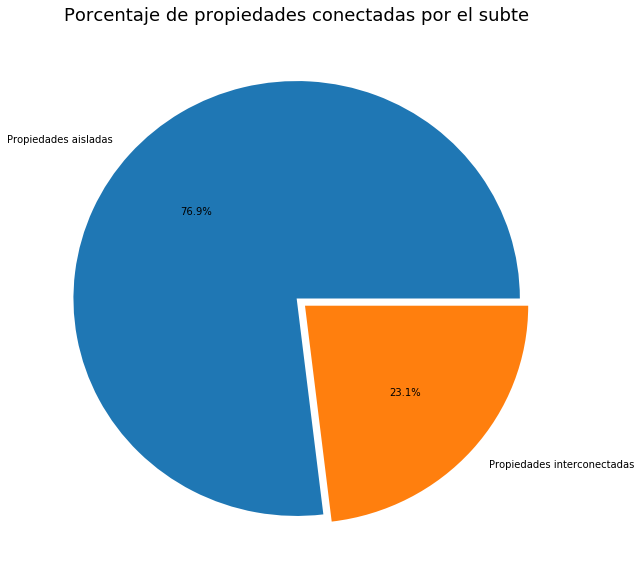

In [42]:
plt.figure(figsize=(10, 10))
plt.title('Porcentaje de propiedades conectadas por el subte', fontsize = 18)
plt.pie([data_trans_count - near_subway_count, near_subway_count], \
        labels= ['Propiedades aisladas','Propiedades interconectadas'], autopct='%1.1f%%', explode=(0, .05))

## ¿Que tan costoso sería vivir a menos de 1km del estadio del club que sos hincha?

In [43]:
grandes_cap=pd.read_csv('Datos Capital/estadios.csv' ,low_memory=False)

In [44]:
cap_est = cap[['place_with_parent_names', 'lat', 'lon', 'price_usd_per_m2']]
for i in range(len(cap.index)):
    minima = 9999999
    est = ''
    for j in range(len(grandes_cap.index)):
        dist = abs(cap_est.loc[i,'lat'] - grandes_cap.loc[j,'lat']) + \
               abs(cap_est.loc[i,'lon'] - grandes_cap.loc[j,'lon'])
        if dist < minima:
            minima = dist
            est = grandes_cap.loc[j, 'CLUB']
    cap_est.loc[i, 'dist_estadio'] = minima * SCALING_FACTOR
    cap_est.loc[i, 'estadio'] = est
cap_est=cap_est.loc[cap_est.dist_estadio<1000]

In [45]:
cap_est.sort_values('dist_estadio')
data_x_club=cap_est[['price_usd_per_m2','estadio']].groupby('estadio').agg(np.mean)
data_x_club

,price_usd_per_m2
estadio,
ALL BOYS,1778.276803
ARGENTINOS JUNIORS,1674.947545
ATLANTA,2245.360476
BOCA JUNIORS,1901.837014
FERRO CARRIL OESTE,2094.391063
HURACAN,1596.215965
NUEVA CHICAGO,1148.315113
RIVER PLATE,3473.575437
SAN LORENZO DE ALMAGRO,1366.521675


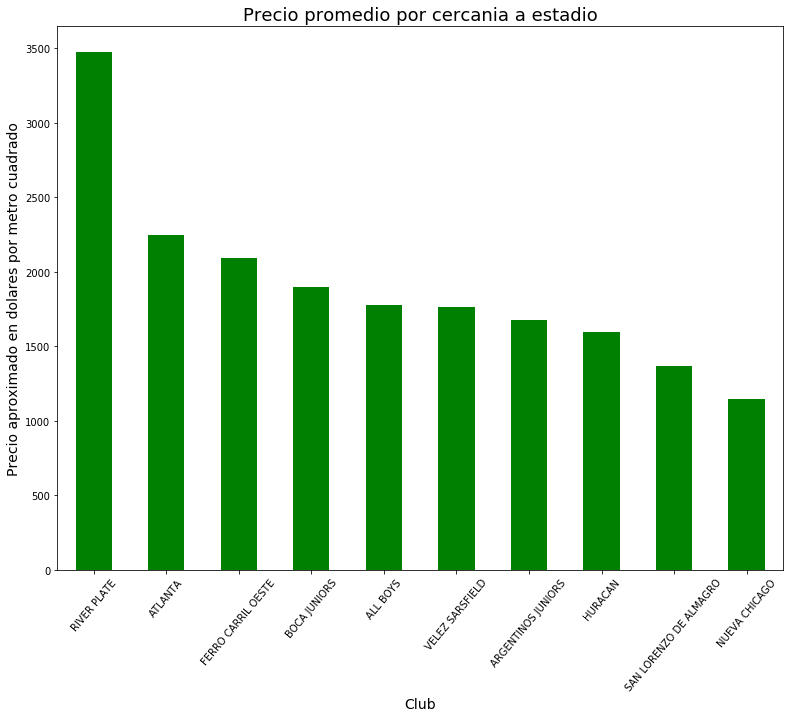

In [46]:
data_x_club.sort_values('price_usd_per_m2', ascending = False).plot(kind = 'bar',rot = 50, color='green' , legend = None, figsize=(13,10))
plt.title('Precio promedio por cercania a estadio', fontsize = 18)
plt.xlabel('Club', fontsize = 14)
plt.ylabel('Precio aproximado en dolares por metro cuadrado', fontsize = 14)

## Ahora supongamos que tenemos un nuevo trabajo y nos queremos mudar  
Nuestro punto de interes será la biblioteca del congreso.

In [47]:
culturales=pd.read_csv("Datos Capital/dependencias-culturales.csv", low_memory=False)
biblio_congreso=culturales.loc[708]
biblio_congreso

lat                                      -34.6115
lon                                      -58.3925
ID                                            730
NOMBRE       BIBLIOTECA DEL CONGRESO DE LA NACION
DIRECCION                     ALSINA, ADOLFO 1835
BARRIO                                  BALVANERA
COMUNA                                   COMUNA 3
ACTIVIDAD                              BIBLIOTECA
DEPENDE                    CONGRESO DE LA NACION.
PUBLICO                                   GENERAL
SECTOR                            ESTADO NACIONAL
ACTIV                                         NaN
Name: 708, dtype: object

Buscaremos propiedades que esten a 800m a la redonda de nuestro futuro trabajo

In [48]:
data_biblio = data.loc[data.place_with_parent_names.str.contains('Capital Federal')]\
          .loc[data.lat.notnull() & data.lon.notnull() & data.price_usd_per_m2.notnull()]\

# Me quedo con los datos que verdaderamente estan situados geograficamente en un entorno de capital federal
data_biblio = data_biblio.loc[((data_biblio.lat > -34.706569) & (data_biblio.lat < -34.533606)) & ((data_biblio.lon > -58.53109) & (data_biblio.lon < -58.345428))]\
         .reset_index(drop = True)

In [49]:
for i in range(len(data_biblio.index)):
    dist = abs(data_biblio.loc[i,'lat'] - biblio_congreso.loc['lat']) + abs(data_biblio.loc[i,'lon'] - biblio_congreso.loc['lon'])
    dist=dist*SCALING_FACTOR
    data_biblio.loc[i, 'dist_biblio'] = dist

In [50]:
data_biblio=data_biblio.loc[data_biblio.dist_biblio<800]

Ahora veamos que lineas de colectivos nos dejan a menos de 3 cuadras de nuestro nuevo trabajo

In [51]:
paradas=pd.read_csv("Datos Capital/paradas-de-colectivo.csv",low_memory=False)

In [52]:
paradas_cercanas = paradas

In [53]:
for i in range(len(paradas_cercanas.index)):
    dist = abs(paradas_cercanas.loc[i,'lat'] - biblio_congreso.loc['lat']) + \
    abs(paradas_cercanas.loc[i,'lon'] - biblio_congreso.loc['lon'])
    dist=dist*SCALING_FACTOR
    paradas_cercanas.loc[i, 'dist_biblio'] = dist

In [54]:
paradas_cercanas = paradas_cercanas.loc[paradas_cercanas.dist_biblio < 300][['LINEAS']].reset_index(drop = True)

In [55]:
for i in range(len(paradas_cercanas)):
    paradas_cercanas.loc[i, 'LINEAS']=paradas_cercanas.loc[i, 'LINEAS'].replace('{', '')
    paradas_cercanas.loc[i, 'LINEAS']=paradas_cercanas.loc[i, 'LINEAS'].replace('}', '')

In [56]:
x = paradas_cercanas.loc[0, 'LINEAS']
for i in range(1, len(paradas_cercanas)):
    seq = (x, paradas_cercanas.loc[i, 'LINEAS'])
    x = ",".join(seq)

In [57]:
x = x.split(',')

In [58]:
y=[]
for i in x:
    if i not in y:
        y.append(i)
y

['56',
 '151',
 '90',
 '12',
 '37',
 '168',
 '60',
 '98',
 '50',
 '6',
 '150',
 '64',
 '8',
 '86',
 '103',
 '2']

Estas son las lineas de colectivo que nos dejan cerca de nuestro nuevo trabajo. Este mismo algoritmo puede usarse para averiguar las paradas de colectivo cercanas a una propiedad en particular.  

Ahora veamos que propiedades se encuentran tan solo a un viaje en colectivo de distancia (con 7 cuadras de caminata) de nuestro nuevo trabajo.

In [59]:
paradas_lineas=paradas
for i in range(len(paradas_lineas.index)):
    for linea in y:
        if paradas_lineas.loc[i, 'LINEAS'].find(','+linea+',') != -1 or \
           paradas_lineas.loc[i, 'LINEAS'].find(','+linea + '}') != -1 or \
            paradas_lineas.loc[i, 'LINEAS'].find('{'+linea + ',') != -1 or \
            paradas_lineas.loc[i, 'LINEAS'].find('{'+linea + '}') != -1:
            paradas_lineas.loc[i, 'me_lleva']= True
            break
        else:
            paradas_lineas.loc[i, 'me_lleva']= False

In [60]:
paradas_lineas=paradas_lineas.loc[paradas_lineas.me_lleva == True].reset_index(drop = True)

In [61]:
data_col = data.loc[data.place_with_parent_names.str.contains('Capital Federal')]\
          .loc[data.lat.notnull() & data.lon.notnull()]

# Me quedo con los datos que verdaderamente estan situados geograficamente en un entorno de capital federal
data_col = data_col.loc[((data_col.lat > -34.706569) & (data_col.lat < -34.533606)) & ((data_col.lon > -58.53109) & (data_col.lon < -58.345428))]\
         .reset_index(drop = True)

In [62]:
for i in range(len(data_col.index)):
    data_col.loc[i,'cerca_de_colectivo']= False
    for j in range(len(paradas_lineas.index)):
        dist = abs(data_col.loc[i,'lat'] - paradas_lineas.loc[j,'lat']) + \
               abs(data_col.loc[i,'lon'] - paradas_lineas.loc[j,'lon'])
        dist=dist*SCALING_FACTOR
        if dist < 400:
            data_col.loc[i,'cerca_de_colectivo']= True
            break

In [63]:
prop_un_colectivo=data_col.loc[data_col.cerca_de_colectivo==True]
prop_un_colectivo.head()

,id,created_on,property_type,place_with_parent_names,geonames_id,lat,lon,price,currency,price_aprox_local_currency,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,actual,cerca_de_colectivo
0,NaN,2012-08-08,apartment,|Argentina|Capital Federal|Palermo|,3430234.0,-34.597915,-58.417149,114982.0,USD,672735.88,...,NaN,NaN,2299.640000,NaN,8.0,2.0,NaN,NaN,False,True
3,NaN,2012-08-15,apartment,|Argentina|Capital Federal|Floresta|,3433910.0,-34.633633,-58.484419,51900.0,USD,418288.05,...,NaN,NaN,2076.000000,NaN,NaN,1.0,NaN,NaN,False,True
5,NaN,2012-08-29,apartment,|Argentina|Capital Federal|Constitución|,3435257.0,-34.628097,-58.390967,69000.0,USD,601659.30,...,NaN,NaN,1916.666667,NaN,NaN,1.0,NaN,<br>MONOAMBIENTE VENTA CONSTITUCIÃ�N Piso alt...,False,True
6,NaN,2012-08-29,apartment,|Argentina|Capital Federal|Constitución|,3435257.0,-34.628097,-58.390967,69000.0,USD,608566.20,...,NaN,NaN,1916.666667,NaN,NaN,1.0,NaN,\n<br>MONOAMBIENTE VENTA CONSTITUCIÃ�N Piso a...,False,True
7,NaN,2012-08-29,apartment,|Argentina|Capital Federal|Constitución|,3435257.0,-34.628097,-58.390967,69000.0,USD,595759.80,...,NaN,NaN,1916.666667,NaN,NaN,1.0,NaN,NaN,False,True


Ahora tenemos un set de datos que contiene las propiedades que estan a un viaje de solo un colectivo de nuestro nuevo trabajo.

Veamos que porcentaje de las propiedades cumplen dicha condición.

In [64]:
data_col_count= data_col['lat'].count()
prop_un_colectivo_count=prop_un_colectivo['lat'].count()
prop_un_colectivo_count*100/data_col_count

64.344776886494785

([<matplotlib.patches.Wedge at 0x7f4fe1b89d30>,
  <matplotlib.text.Text at 0x7f4fe17c5a90>])

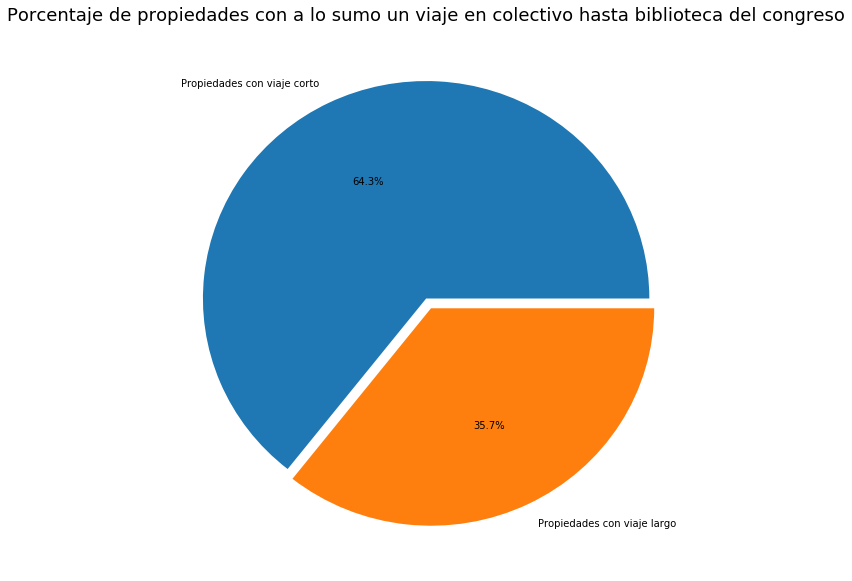

In [65]:
plt.figure(figsize=(10, 10))
plt.title('Porcentaje de propiedades con a lo sumo un viaje en colectivo hasta biblioteca del congreso', fontsize = 18)
plt.pie([prop_un_colectivo_count, data_col_count-prop_un_colectivo_count], \
        labels= ['Propiedades con viaje corto','Propiedades con viaje largo'], autopct='%1.1f%%', explode=(0, .05))

Mas del 64% de las propiedades en Capital Federal estan a un viaje en colectivo de la biblioteca del congreso.

## ¿Los precios cumplen la Ley de Benford?

In [66]:
precios = data.loc[data.price_usd_per_m2.notnull()][['price_usd_per_m2']]

In [67]:
precios['first_digit'] = precios['price_usd_per_m2'].apply(lambda x: str(x)[0])
precios = precios.loc[precios.first_digit != '0']
digitos = precios.groupby('first_digit').agg(np.size)
digitos['price_usd_per_m2'] = digitos['price_usd_per_m2'] / digitos['price_usd_per_m2'].sum()

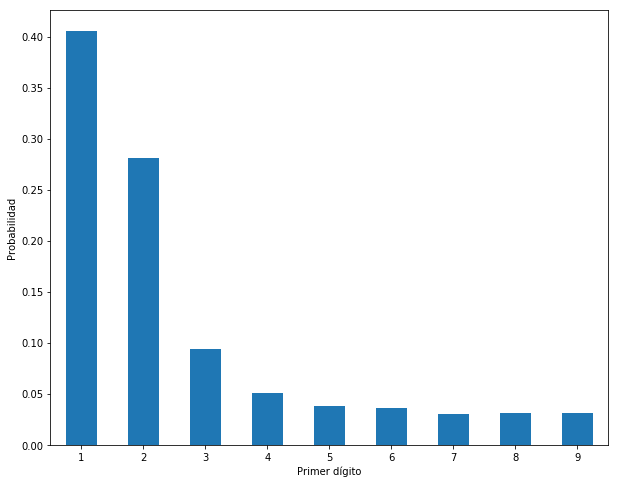

In [68]:
digitos.plot(kind = 'bar', rot = 0, figsize = (10,8), legend = None)
plt.xlabel('Primer dígito')
plt.ylabel('Probabilidad')

En el gráfico se observa claramente que la probabilidad de que el primer dígito sea 1 es mayor a que sea 2, y así sucesivamente, verificando (de forma aproximada) la Ley de Benford.